In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem
from scipy.stats import linregress
import scipy.stats as st
import sys
import requests
import gmaps
import time
import seaborn

# Import API key
from api_keys import g_key
# Configure gmaps
gmaps.configure(api_key=g_key)

In [2]:
#Path to CSV files

merged_data_load = "Resources/merged_final.csv"
merged_data_load1 = "Resources/lastone.csv"

#Read data into pandas and store into DataFrames
merged_data = pd.read_csv(merged_data_load)
merged_final = pd.read_csv(merged_data_load1)
merged_data.head()

,Unnamed: 0,Census_Tract,Pct_Pop_Below_Pov,Pct_Child_Below_Pov,Offense,Method,Latitude,Longitude,Start_Date,CCN
0,0,201,100.0,25.055524,THEFT/OTHER,OTHERS,38.912577,-77.073401,2017-10-18 17:00:00+00:00,17401735
1,1,201,100.0,25.055524,THEFT/OTHER,OTHERS,38.912603,-77.074958,2017-11-20 05:55:00+00:00,17401924
2,2,201,100.0,25.055524,THEFT/OTHER,OTHERS,38.910192,-77.069144,2017-07-18 18:15:00+00:00,17401306
3,3,201,100.0,25.055524,THEFT F/AUTO,OTHERS,38.911183,-77.069192,2017-02-12 14:00:29+00:00,17029071
4,4,201,100.0,25.055524,THEFT F/AUTO,OTHERS,38.910192,-77.069144,2017-03-05 12:00:58+00:00,17037424


In [3]:
# Group by Offenses
group_of_offenses = merged_data.set_index('Offense').groupby(['Offense']) 
group_of_offenses.count()

,Unnamed: 0,Census_Tract,Pct_Pop_Below_Pov,Pct_Child_Below_Pov,Method,Latitude,Longitude,Start_Date,CCN
Offense,,,,,,,,,
ARSON,3,3,3,3,3,3,3,3,3
ASSAULT W/DANGEROUS WEAPON,1406,1406,1406,1406,1406,1406,1406,1406,1406
BURGLARY,1034,1034,1034,1034,1034,1034,1034,1034,1034
HOMICIDE,98,98,98,98,98,98,98,98,98
MOTOR VEHICLE THEFT,1698,1698,1698,1698,1698,1698,1698,1698,1698
ROBBERY,1494,1494,1494,1494,1494,1494,1494,1494,1494
SEX ABUSE,211,211,211,211,211,211,211,211,211
THEFT F/AUTO,5573,5573,5573,5573,5573,5573,5573,5573,5573
THEFT/OTHER,8242,8242,8242,8242,8242,8242,8242,8242,8242


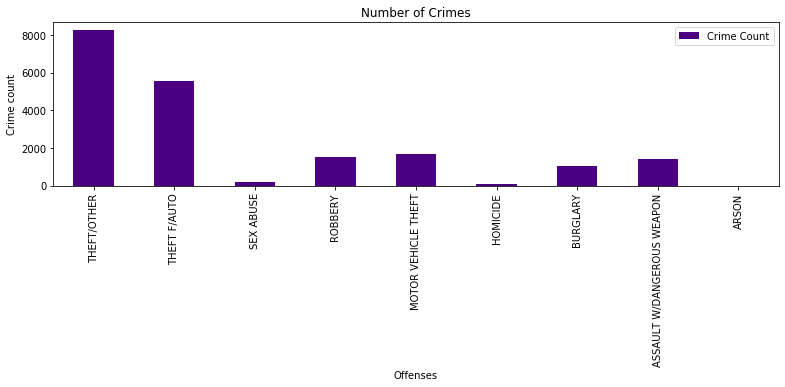

In [4]:
# Generate a bar plot showing the number of crime count per each offense.

# Group by Offense type
grouped_data = pd.DataFrame(merged_data.groupby(["Offense"]).count()).reset_index()
offense_datapoints = grouped_data[["Offense", "CCN"]] 
offense_datapoints = offense_datapoints.rename(columns={"CCN": "Crime Count"})
offense_datapoints = offense_datapoints.set_index("Offense")
offense_datapoints.sort_values("Offense", ascending=False, inplace=True)

# Use DataFrame.plot() in order to create a bar chart of the data
offense_datapoints.plot(kind="bar", figsize=(13,3), color = "indigo")

#Give the chart a title, x label, and y label
plt.title("Number of Crimes")
plt.ylabel("Crime count")
plt.xlabel("Offenses")
plt.show()

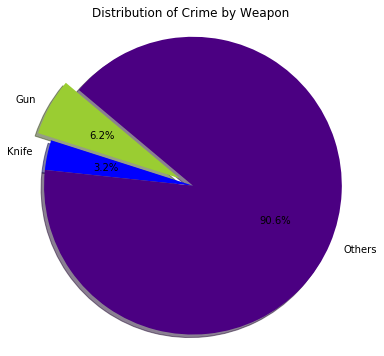

In [5]:
# Generate a pie plot showing the distribution of crime by weapon

# Group by method and get values of each section of the pie chart
weapon_count = (merged_data.groupby(["Method"])["CCN"]).count().tolist()

# Labels for the sections of our pie chart
labels = ["Gun", "Knife", "Others"]

# The colors of each section of the pie chart
colors = ["yellowgreen", "blue", "indigo"]

plt.figure(figsize=(6, 6))

# Tells matplotlib to seperate the "Gun" section from the other counts
explode = (0.1, 0, 0)

# Creates the pie chart based upon the values above
plt.pie(weapon_count, explode=explode, labels=labels, colors = colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

plt.title("Distribution of Crime by Weapon")
#plt.savefig('Images/Pie_Chart_Distribution_of_Crime_By_Weapon.png')
plt.show()

In [6]:

# Store latitude and longitude for crime locations
locations = merged_data[["Latitude","Longitude"]]

offense_rate = grouped_data["Offense"]

In [7]:
# Customize the size of the figure
figure_layout = {
    'width': '800px',
    'height': '800px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}


# Plot Heatmap
fig = gmaps.figure(map_type="HYBRID", layout = figure_layout)

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, dissipating=True)

# Add layer
fig.add_layer(heat_layer)


# Display figure
fig

Figure(layout=FigureLayout(border='1px solid black', height='800px', margin='0 auto 0 auto', padding='1px', wi…

In [12]:
merged_final.head()

,Unnamed: 0,Census,Number of Crimes,Total Population,Percentage of Population in Poverty,Percentage of Children in Poverty,Latitude,Longitude
0,0,201,23,24.0,100.0,25.055524,38.911904,-77.074202
1,1,202,603,3595.0,16.2,0.000000,38.906516,-77.065324
2,2,501,105,3593.0,7.1,10.900000,38.924631,-77.052344
3,3,502,65,3296.0,2.8,0.000000,38.928411,-77.057113
4,4,701,43,5643.0,11.7,8.000000,38.930409,-77.075336


In [13]:
import seaborn as sn

In [14]:
merged_final.describe()

,Unnamed: 0,Census,Number of Crimes,Total Population,Percentage of Population in Poverty,Percentage of Children in Poverty,Latitude,Longitude
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,63.000000,6117.992126,155.582677,3445.322835,20.117323,23.283552,38.906453,-77.001829
std,36.805797,3219.504550,106.278418,1331.690356,15.112163,21.576981,0.035647,0.041362
min,0.000000,201.000000,2.000000,24.000000,0.000000,0.000000,38.827351,-77.104387
25%,31.500000,2701.500000,88.500000,2560.500000,9.100000,1.300000,38.886083,-77.028853
50%,63.000000,7409.000000,128.000000,3271.000000,15.700000,21.400000,38.907064,-76.998436
75%,94.500000,8903.500000,194.000000,4068.000000,28.400000,43.650000,38.930687,-76.977099
max,126.000000,9907.000000,603.000000,7674.000000,100.000000,77.100000,38.972860,-76.919014


In [15]:
#Correlations 
merged_final.corr()

,Unnamed: 0,Census,Number of Crimes,Total Population,Percentage of Population in Poverty,Percentage of Children in Poverty,Latitude,Longitude
Unnamed: 0,1.000000,0.969295,0.065111,-0.306494,0.251593,0.370181,-0.491519,0.754286
Census,0.969295,1.000000,0.096092,-0.317483,0.298728,0.419992,-0.577254,0.796605
Number of Crimes,0.065111,0.096092,1.000000,0.286115,0.014407,0.121176,-0.046053,0.147368
Total Population,-0.306494,-0.317483,0.286115,1.000000,-0.207819,-0.082997,0.188685,-0.266772
Percentage of Population in Poverty,0.251593,0.298728,0.014407,-0.207819,1.000000,0.764240,-0.541075,0.338487
Percentage of Children in Poverty,0.370181,0.419992,0.121176,-0.082997,0.764240,1.000000,-0.594563,0.503447
Latitude,-0.491519,-0.577254,-0.046053,0.188685,-0.541075,-0.594563,1.000000,-0.491782
Longitude,0.754286,0.796605,0.147368,-0.266772,0.338487,0.503447,-0.491782,1.000000


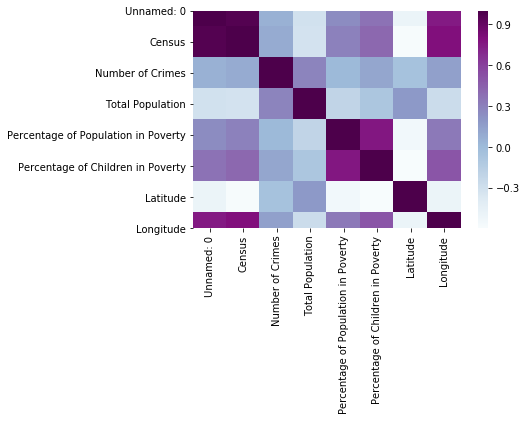

In [35]:
sn.heatmap(merged_final.corr(), cmap="BuPu")

R squared: 0.08186157645192137


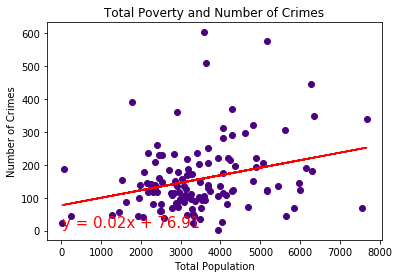

In [18]:
# Linear Regression

## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = merged_final['Total Population'].astype('float')
y_values = merged_final['Number of Crimes'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, color='indigo')

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="r")

plt.title("Total Poverty and Number of Crimes")

# Label plot
plt.xlabel('Total Population')

plt.ylabel('Number of Crimes')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

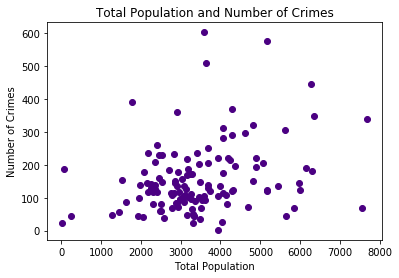

In [19]:
# Scatterplot - Total Poverty Population to predict Number of Crimes
plt.scatter(merged_final["Total Population"], merged_final["Number of Crimes"], color ="indigo")
plt.ylabel("Number of Crimes")
plt.xlabel("Total Population")
plt.title("Total Population and Number of Crimes")
plt.show()

In [20]:
# Import statmodels
import statsmodels.api as sm 

X = merged_final["Total Population"]
y = merged_final["Number of Crimes"]
X= sm.add_constant(X)

# Note the difference in argument order
model = sm.OLS(y,X).fit()
predictions = model.predict(X)

#print out the statistics

model.summary()

C:\Users\anagi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Number of Crimes   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     11.15
Date:                Mon, 11 May 2020   Prob (F-statistic):            0.00111
Time:                        13:17:27   Log-Likelihood:                -766.87
No. Observations:                 127   AIC:                             1538.
Df Residuals:                     125   BIC:                             1543.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               76.9122     25.251      3.046      0.003      26.937     126.888
Total Population     0.0228      0.007      3.338      0.001       0.009       0.036
==============================================================================
Omnibus:                       53.126   Durbin-Watson:                   1.632
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.582
Skew:                           1.634   Prob(JB):                     4.02e-32
Kurtosis:                       7.079   Cond. No.                     1.03e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

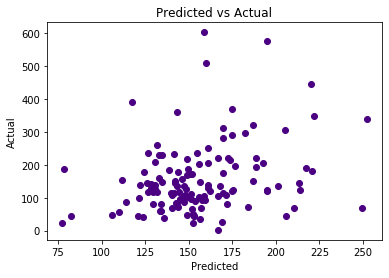

In [21]:
#Scatter plot Predicted vs Actual

plt.scatter(predictions, merged_final["Number of Crimes"], color ="indigo")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Predicted vs Actual")
plt.show()

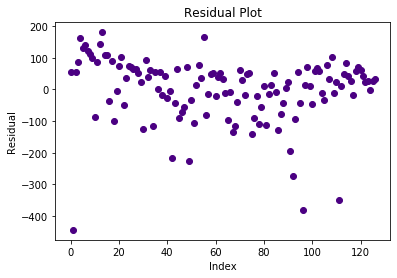

In [22]:
# Scatterplot Residual plot 
plt.scatter(merged_final.index.values, predictions - merged_final["Number of Crimes"], color ="indigo")

plt.xlabel("Index")
plt.ylabel("Residual")
plt.title("Residual Plot")

plt.show()

In [23]:
# Store latitude and longitude for Poverty locations
locations = merged_final[["Latitude","Longitude"]]

pov_rate = merged_final["Total Population"]

In [24]:
# Customize the size of the figure
figure_layout = {
    'width': '800px',
    'height': '800px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}


# Plot Heatmap
fig = gmaps.figure(map_type="HYBRID", layout = figure_layout)

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, dissipating=True)

# Add layer
fig.add_layer(heat_layer)

# Display figure


In [25]:
# Convert Percentage of Poverty to list
crime_rate = merged_final["Number of Crimes"].tolist()


In [26]:
# Create a marker_layer using the poverty list to fill the info box

crime_layer = gmaps.symbol_layer(locations, fill_color = 'rgba(0, 150, 0, 0.4)', stroke_color='rgba(1,1,150,0.4)', scale=2,
    info_box_content=[f"Number of Crimes: {rate}" for rate in crime_rate]
)

fig = gmaps.figure()
fig.add_layer(crime_layer)


In [27]:
#Create a combined map
fig = gmaps.figure()

fig.add_layer(heat_layer)
fig.add_layer(crime_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [28]:
merged_top5 = merged_final.groupby(['Number of Crimes','Total Population', 'Latitude', 'Longitude']).count()
merged_top5  = pd.DataFrame(merged_top5)
merged_top5.reset_index(inplace=True)
merged_top5.sort_values('Number of Crimes', ascending=False, inplace=True)
merged_top5 = merged_top5.head(5)

In [36]:
locations1 = merged_top5[["Latitude","Longitude"]]

pov_rate5 = merged_top5["Number of Crimes"]


In [30]:
# Customize the size of the figure
figure_layout = {
    'width': '800px',
    'height': '800px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}


# Plot Heatmap
fig = gmaps.figure(map_type="HYBRID", layout = figure_layout)

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations1, weights=pov_rate5, dissipating=True)

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(border='1px solid black', height='800px', margin='0 auto 0 auto', padding='1px', wi…